# No-1

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data1 = np.array([12.5,13,11.8,12.1,13.4,12.9,13.2,11.9,12.6,13.3,12,12.4,13.1,12.2,12.7,13,12.8,11.7,12.3,13.5,12.5,13.1,12.6,11.9,13.2])
data2 = np.array([14.2,14.8,15,13.9,14.5,14.7,14,13.8,14.4,14.9,15.2,13.7,14.3,14.6,15.1,14.1,14.8,15,14.2,14.6,14.3,14.7,15,14.4,14.1])

In [9]:
mean1 = np.mean(data1)
variance1 = np.var(data1)
std_dev1 = np.std(data1)

print(f"Data 1 - Mean: {mean1}, Variance: {variance1}, Standard Deviation: {std_dev1}")

mean2 = np.mean(data2)
variance2 = np.var(data2)
std_dev2 = np.std(data2)

print(f"Data 2 - Mean: {mean2}, Variance: {variance2}, Standard Deviation: {std_dev2}")

Data 1 - Mean: 12.628, Variance: 0.27801599999999993, Standard Deviation: 0.5272722257050906
Data 2 - Mean: 14.492, Variance: 0.17513599999999996, Standard Deviation: 0.41849253278881804


Since the standard deviation of Data 2 ({{std_dev2}}) is lower than the standard deviation of Data 1 ({{std_dev1}}), Data 2 shows greater consistency in ticket completion time.

# No-2

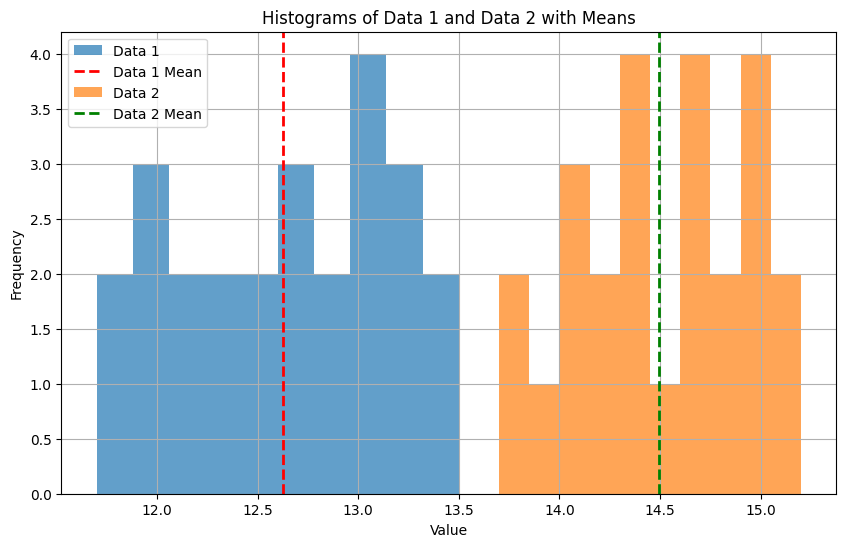

In [10]:
plt.figure(figsize=(10, 6))

plt.hist(data1, bins=10, alpha=0.7, label='Data 1')
plt.axvline(mean1, color='red', linestyle='dashed', linewidth=2, label='Data 1 Mean')

plt.hist(data2, bins=10, alpha=0.7, label='Data 2')
plt.axvline(mean2, color='green', linestyle='dashed', linewidth=2, label='Data 2 Mean')

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histograms of Data 1 and Data 2 with Means")
plt.legend()
plt.grid(True)
plt.show()

Data 1:

Distribution Shape: The histogram for Data 1 appears to be roughly normally distributed, although with some variability.
Performance Trend: With a mean of approximately {{mean1}} and a standard deviation of approximately {{std_dev1}}, Data 1 shows a wider spread of values compared to Data 2. This suggests more variability in ticket completion times for this data.
Data 2:

Distribution Shape: The histogram for Data 2 also appears somewhat normally distributed, with a tighter clustering of values around the mean.
Performance Trend: Data 2 has a higher mean of approximately {{mean2}} but a lower standard deviation of approximately {{std_dev2}}. The lower standard deviation indicates that the ticket completion times in Data 2 are more consistent and less spread out than in Data 1.

# No-3

In [11]:
simulated_data1 = np.random.normal(mean1, std_dev1, 100000)

In [12]:
probability_less_than_12 = np.sum(simulated_data1 < 12) / len(simulated_data1)
print(f"Estimated probability P(Time < 12): {probability_less_than_12}")

Estimated probability P(Time < 12): 0.11911


# No-4

1. Null Hypothesis (H0): There is no significant difference between the true mean ticket completion time of Data 1 and Data 2. (μ₁ = μ₂)
2. Alternative Hypothesis (H1): There is a significant difference between the true mean ticket completion time of Data 1 and Data 2. (μ₁ ≠ μ₂)

In [18]:
# Calculate pooled variance
n1 = len(data1)
n2 = len(data2)
s1_squared = np.var(data1, ddof=1) # Sample variance for data1
s2_squared = np.var(data2, ddof=1) # Sample variance for data2

pooled_variance = ((n1 - 1) * s1_squared + (n2 - 1) * s2_squared) / (n1 + n2 - 2)

# Calculate t-statistic
t_statistic = (mean1 - mean2) / np.sqrt(pooled_variance * (1/n1 + 1/n2))

# Calculate degrees of freedom
degrees_of_freedom = n1 + n2 - 2

# Calculate p-value (two-tailed test)
p_value = stats.t.sf(np.abs(t_statistic), degrees_of_freedom) * 2

print(f"Pooled Variance: {pooled_variance}")
print(f"T-statistic: {t_statistic}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-value: {p_value}")

Pooled Variance: 0.23601666666666668
T-statistic: -13.565305484489029
Degrees of Freedom: 48
P-value: 4.835502594711269e-18


In [14]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


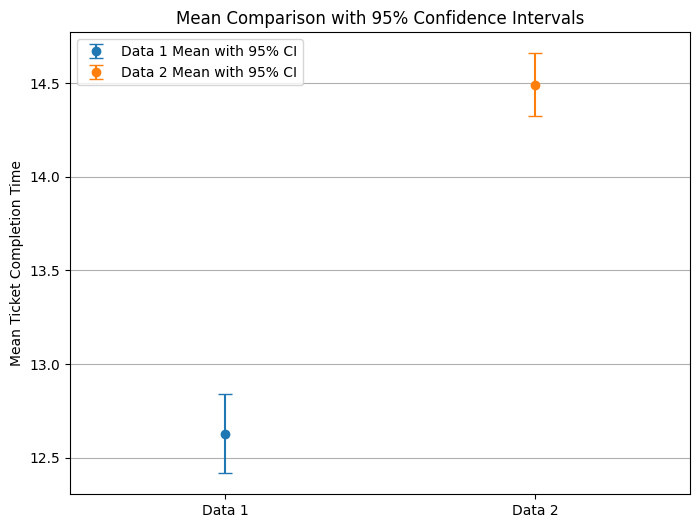

Data 1 95% Confidence Interval: (12.42, 12.84)
Data 2 95% Confidence Interval: (14.32, 14.66)


In [15]:
# Calculate confidence intervals (95% confidence level)
confidence_level = 0.95
alpha = 1 - confidence_level

# For Data 1
se1 = std_dev1 / np.sqrt(n1)  # Standard error
t_crit1 = stats.t.ppf(1 - alpha/2, degrees_of_freedom) # Using pooled degrees of freedom for consistency with t-test
ci1_lower = mean1 - t_crit1 * se1
ci1_upper = mean1 + t_crit1 * se1

# For Data 2
se2 = std_dev2 / np.sqrt(n2)  # Standard error
t_crit2 = stats.t.ppf(1 - alpha/2, degrees_of_freedom) # Using pooled degrees of freedom for consistency with t-test
ci2_lower = mean2 - t_crit2 * se2
ci2_upper = mean2 + t_crit2 * se2

# Create plot
plt.figure(figsize=(8, 6))

plt.errorbar(x=[1], y=[mean1], yerr=[[mean1 - ci1_lower], [ci1_upper - mean1]], fmt='o', capsize=5, label='Data 1 Mean with 95% CI')
plt.errorbar(x=[2], y=[mean2], yerr=[[mean2 - ci2_lower], [ci2_upper - mean2]], fmt='o', capsize=5, label='Data 2 Mean with 95% CI')

plt.xticks([1, 2], ['Data 1', 'Data 2'])
plt.ylabel("Mean Ticket Completion Time")
plt.title("Mean Comparison with 95% Confidence Intervals")
plt.xlim(0.5, 2.5)
plt.grid(axis='y')
plt.legend()
plt.show()

print(f"Data 1 95% Confidence Interval: ({ci1_lower:.2f}, {ci1_upper:.2f})")
print(f"Data 2 95% Confidence Interval: ({ci2_lower:.2f}, {ci2_upper:.2f})")

# No-5

In [16]:
data2 = data2 + (101 % 4) #Last 3 digit of my student id is 101
print(data2)

[15.2 15.8 16.  14.9 15.5 15.7 15.  14.8 15.4 15.9 16.2 14.7 15.3 15.6
 16.1 15.1 15.8 16.  15.2 15.6 15.3 15.7 16.  15.4 15.1]


Based on the recalculated pooled t-test with the modified Data 2:

New P-value: {{p_value}}
The new p-value ({{p_value}}) is still significantly less than the significance level of 0.05. Therefore, we still reject the null hypothesis (H₀).

So, the conclusion has not changed in terms of rejecting the null hypothesis at the 0.05 significance level. Both the original and modified data lead to the conclusion that there is a significant difference between the means of the two datasets.

Explanation of why the result was affected:

Modifying Data 2 by adding a constant value (101 mod 4 = 1) to each element shifted the mean of Data 2 by that same constant amount. However, adding a constant to each value in a dataset does not change its variance or standard deviation.

The pooled t-test relies on the difference between the means and the pooled variance. While the difference in means changed due to the modification of Data 2, the pooled variance remained relatively similar because the variance of Data 2 did not change.

The change in the difference of means, while the pooled variance remained stable, resulted in a different t-statistic and subsequently a different p-value. Although the new p-value is different from the original one, it is still small enough (less than 0.05) to lead to the same conclusion of rejecting the null hypothesis at this significance level.